In [14]:
import pandas as pd

In [15]:
df_employee = pd.read_csv("2_training_data_and_feature_engineering_employee.csv")
df_employee

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes,Attrition
0,42.000000,1368.000000,28.000000,4.000000,88.000000,2.000000,2.000000,4.000000,4523.000000,4386.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0
1,25.000000,309.000000,2.000000,3.000000,82.000000,3.000000,1.000000,2.000000,2187.000000,19655.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0
2,29.000000,1396.000000,10.000000,3.000000,99.000000,3.000000,1.000000,3.000000,2642.000000,2755.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0
3,29.000000,986.000000,3.000000,2.000000,93.000000,2.000000,3.000000,3.000000,11935.000000,21526.000000,...,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0
4,50.000000,854.000000,1.000000,4.000000,68.000000,3.000000,5.000000,4.000000,19517.000000,24118.000000,...,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,26.008398,138.470606,16.173665,3.834733,57.445411,3.165267,1.000000,2.834733,2447.215954,25638.195863,...,0.000000,0.0,0.0,0.0,0.834733,0.000000,0.165267,0.165267,0.834733,1
470,39.000000,1153.087248,2.984364,3.953091,41.203273,2.984364,1.984364,2.968727,5213.106840,17768.665065,...,0.015636,0.0,0.0,0.0,0.000000,0.984364,0.000000,0.000000,1.000000,1
471,35.612788,359.576599,20.882993,3.423401,91.306394,3.423401,1.000000,1.000000,3502.615396,21874.978424,...,0.000000,0.0,0.0,0.0,0.576599,0.000000,0.000000,1.000000,0.000000,1
472,24.318104,531.314693,11.159052,3.394882,81.974408,2.210237,1.000000,2.210237,2063.137252,13912.972892,...,0.605118,0.0,0.0,0.0,0.394882,0.000000,0.000000,0.605118,0.394882,1


In [16]:
print(df_employee["Attrition"].unique())

[0 1]


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [18]:
X = df_employee.drop("Attrition", axis=1)
y = df_employee["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

num_cols = X.select_dtypes(include=["int64","float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

logreg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=300, random_state=42))
])

for name, pipeline in [("Logistic Regression", logreg_pipeline), ("Random Forest", rf_pipeline)]:
    print(f"\n=== {name} ===")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))


=== Logistic Regression ===
Accuracy: 0.6947368421052632
              precision    recall  f1-score   support

           0     0.6792    0.7500    0.7129        48
           1     0.7143    0.6383    0.6742        47

    accuracy                         0.6947        95
   macro avg     0.6968    0.6941    0.6935        95
weighted avg     0.6966    0.6947    0.6937        95


=== Random Forest ===
Accuracy: 0.7684210526315789
              precision    recall  f1-score   support

           0     0.7321    0.8542    0.7885        48
           1     0.8205    0.6809    0.7442        47

    accuracy                         0.7684        95
   macro avg     0.7763    0.7675    0.7663        95
weighted avg     0.7759    0.7684    0.7666        95



In [19]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

result_log = permutation_importance(log_reg, X_test, y_test, n_repeats=10, random_state=42)

result_log_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": result_log.importances_mean
})

print("\n=== Logistic Regression Feature Importance ===")
print(result_log_df.sort_values("Importance", ascending=False).round(4).to_string(index=False))

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

result_rf = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

result_rf_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": result_rf.importances_mean
})

print("\n=== Random Forest Feature Importance ===")
print(result_rf_df.sort_values("Importance", ascending=False).round(4).to_string(index=False))


c:\Users\borfor\Documents\ML-Project-Final\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression Feature Importance ===
                          Feature  Importance
                    MonthlyIncome      0.1042
                   YearsAtCompany      0.0463
               YearsInCurrentRole      0.0453
                 DistanceFromHome      0.0400
          EnvironmentSatisfaction      0.0400
                      MonthlyRate      0.0337
          YearsSinceLastPromotion      0.0326
                 StockOptionLevel      0.0295
                       HourlyRate      0.0221
             EducationField_Other      0.0105
                  JobSatisfaction      0.0074
     EducationField_Life Sciences      0.0021
    JobRole_Laboratory Technician      0.0011
  EducationField_Technical Degree      0.0011
     JobRole_Sales Representative      0.0000
                         JobLevel      0.0000
          JobRole_Human Resources      0.0000
   JobRole_Manufacturing Director      0.0000
       Department_Human Resources      0.0000
     BusinessTravel_Travel_Rarel

In [24]:
from sklearn.metrics import accuracy_score, f1_score

selected_features = [
    'StockOptionLevel','Age','EnvironmentSatisfaction','JobLevel',
    'JobRole_Laboratory Technician','MonthlyIncome','YearsAtCompany',
    'JobSatisfaction','YearsSinceLastPromotion','JobRole_Healthcare Representative',
    'BusinessTravel_Travel_Frequently','PercentSalaryHike','YearsInCurrentRole',
    'OverTime_Yes','DailyRate'
]

X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Selected features: {selected_features}")
print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")


Selected features: ['StockOptionLevel', 'Age', 'EnvironmentSatisfaction', 'JobLevel', 'JobRole_Laboratory Technician', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'YearsSinceLastPromotion', 'JobRole_Healthcare Representative', 'BusinessTravel_Travel_Frequently', 'PercentSalaryHike', 'YearsInCurrentRole', 'OverTime_Yes', 'DailyRate']
Accuracy: 0.8105
F1-score: 0.8043


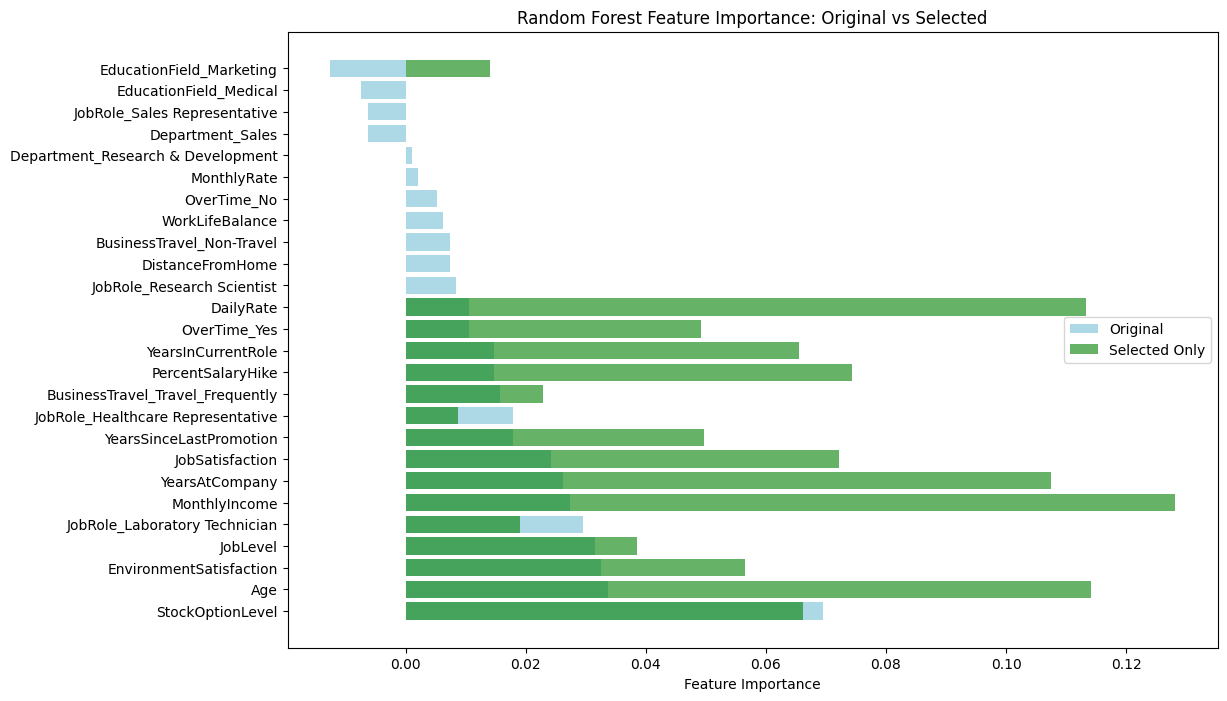

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

feature_importances = {
    'StockOptionLevel':0.0695,'Age':0.0337,'EnvironmentSatisfaction':0.0326,'JobLevel':0.0316,
    'JobRole_Laboratory Technician':0.0295,'MonthlyIncome':0.0274,'YearsAtCompany':0.0263,
    'JobSatisfaction':0.0242,'YearsSinceLastPromotion':0.0179,'JobRole_Healthcare Representative':0.0179,
    'BusinessTravel_Travel_Frequently':0.0158,'PercentSalaryHike':0.0147,'YearsInCurrentRole':0.0147,
    'OverTime_Yes':0.0105,'DailyRate':0.0105,'JobRole_Research Scientist':0.0084,
    'DistanceFromHome':0.0074,'BusinessTravel_Non-Travel':0.0074,'WorkLifeBalance':0.0063,
    'OverTime_No':0.0053,'MonthlyRate':0.0021,'Department_Research & Development':0.0011,
    'Department_Sales':-0.0063,'JobRole_Sales Representative':-0.0063,
    'EducationField_Medical':-0.0074,'EducationField_Marketing':-0.0126
}

df_all = pd.DataFrame({
    'Feature': list(feature_importances.keys()),
    'Importance': list(feature_importances.values())
})

selected_features = df_all[df_all['Importance'].abs() >= 0.01]['Feature'].tolist()
X_selected = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
rf_new = RandomForestClassifier(n_estimators=100, random_state=42)
rf_new.fit(X_train, y_train)

df_selected = pd.DataFrame({
    'Feature': selected_features,
    'Importance': rf_new.feature_importances_
})

df_plot = pd.concat([
    df_all.set_index('Feature')['Importance'],
    df_selected.set_index('Feature')['Importance']
], axis=1, keys=['Original', 'Selected']).reset_index()

plt.figure(figsize=(12,8))
plt.barh(df_plot['Feature'], df_plot['Original'], color='lightblue', label='Original')
plt.barh(df_plot['Feature'], df_plot['Selected'], color='green', alpha=0.6, label='Selected Only')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance: Original vs Selected')
plt.legend()
plt.show()


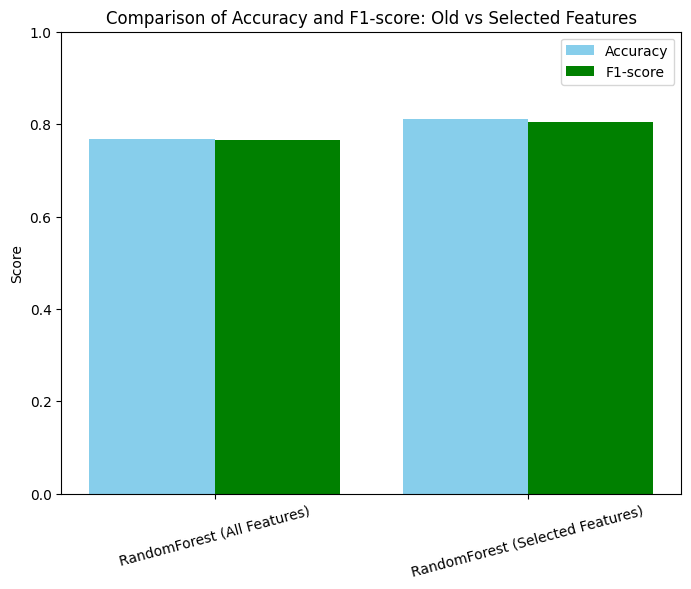

In [ ]:
import matplotlib.pyplot as plt

models = ['RandomForest (All Features)', 'RandomForest (Selected Features)']
accuracy = [0.7684, 0.8105]
f1_score_vals = [0.7666, 0.8043]

x = range(len(models))

plt.figure(figsize=(8,6))


plt.bar(x, accuracy, width=0.4, label='Accuracy', color='skyblue', align='center')

plt.bar([i + 0.4 for i in x], f1_score_vals, width=0.4, label='F1-score', color='green', align='center')

plt.xticks([i + 0.2 for i in x], models, rotation=15)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Comparison of Accuracy and F1-score: Old vs Selected Features')
plt.legend()
plt.show()


In [ ]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

selected_features = [
    'StockOptionLevel','Age','EnvironmentSatisfaction','JobLevel',
    'JobRole_Laboratory Technician','MonthlyIncome','YearsAtCompany',
    'JobSatisfaction','YearsSinceLastPromotion','JobRole_Healthcare Representative',
    'BusinessTravel_Travel_Frequently','PercentSalaryHike','YearsInCurrentRole',
    'OverTime_Yes','DailyRate'
]

X_new = X[selected_features]
y_new = y

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

rf_new = RandomForestClassifier(n_estimators=100, random_state=42)
rf_new.fit(X_train, y_train)

y_pred = rf_new.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

joblib.dump(rf_new, 'rf_selected_features_model.joblib')
print("Saved Random Forest model as 'rf_selected_features_model.joblib'")

rf_loaded = joblib.load('rf_selected_features_model.joblib')

y_new_pred = rf_loaded.predict(X_test)
print(f"Loaded model F1-score: {f1_score(y_test, y_new_pred):.4f}")


Accuracy: 0.8105, F1-score: 0.8043
Saved Random Forest model as 'rf_selected_features_model.joblib'
Loaded model F1-score: 0.8043


In [22]:
df_employee.to_csv("3_model_development_employee.csv", index= False)